# Detecting Coordinated Behavior Through Hashtag Use -- Toy Scenario

In [70]:
import random
from hashtags import simulate_toy_cib, gini_cib, get_group_counts, plot_ginis
from matplotlib import pyplot as plt

## Simulating CIB in hashtag use
What we do:  
1. We start by simulating a toy scenario of (un)coordinated behavior. We have a bag of about 50 hashtags representing hobbies and other lovely things (that each occurs with equal frequency, 30 times). These tweets represent the uncoordinated behavior.  
1. We then create a few hashtags (generated by the disruptive MangoTree team, argh!) that occur more often by some hand-picked factor (e.g. 10x etc.).  
1. We add uncoordinated tweets into our bag of tweets and randomly sample between 800 and 1200 tweets from the bag 21-times in a row (e.g. each sampling represents a day).
1. **CIB Attack:** On Day 11 we add the injected tweets by the MangoTree team (injection).
1. **Test:** Compute the gini coefficient over the sampled tweets, per each day. (Gini closer to 1 indicates coordination, Gini closer to 0 indicates no coordination).
1. We expect Gini coefficient to increase after Day 11, indicating CIB.

In [71]:
base_rate = 30
injection_dict = {
    "Mangoes": 10.5,  # 10.5 times more often etc.
    "Mango": 12.3,
    "MangoTrees": 8.7,
    "MangoTango": 5.4,
    "MangoTime": 13.7,
    "LowHangingFruit": 4.8
}

tweets_dict1, vocab1 = simulate_toy_cib(
    base_rate=base_rate,
    injection_hashtags=injection_dict,
    n_days=21,
    min_tweets=800,
    max_tweets=1200,
    seed=54321)

cib_ginis1, cib_counts1 = gini_cib(tweets_dict1, vocab1)
group_counts1 = get_group_counts(cib_counts1, vocab1, list(injection_dict.keys()))

Below we print a random sample of 10 tweets on Day 1 (no CIB) and Day 11 (CIB). We seeg hashtags related to Mangos on Day 11. Gini should pick up on that.

In [72]:
# show some sample of tweets
random.seed(12345)
print(f"Day1: {', '.join([f'#{s}' for s in random.sample(tweets_dict1[0], 10)])}")
print()
print(f"Day11: {', '.join([f'#{s}' for s in random.sample(tweets_dict1[10], 10)])}")

Day1: #Skiing, #Reading, #Cooking, #Cooking, #Music, #Fitness, #Fitness, #Music, #Antiquing, #Homebrewing

Day11: #Antiquing, #Mangoes, #Mangoes, #LowHangingFruit, #MangoTime, #Surfing, #Music, #Mango, #MangoTime, #Mangoes


## Plotting the gini coefficients over time

Below we plot the obtained gini coefficient in this (extreme) toy scenario. We see that Gini coefficient indeed shoots up at Day 11 (~0.6) when we injected CIB into our bag of tweets. The barplots shows the actual count of mango-related tweets vs. all other tweets, to confirm that Gini is reflecting the data well.

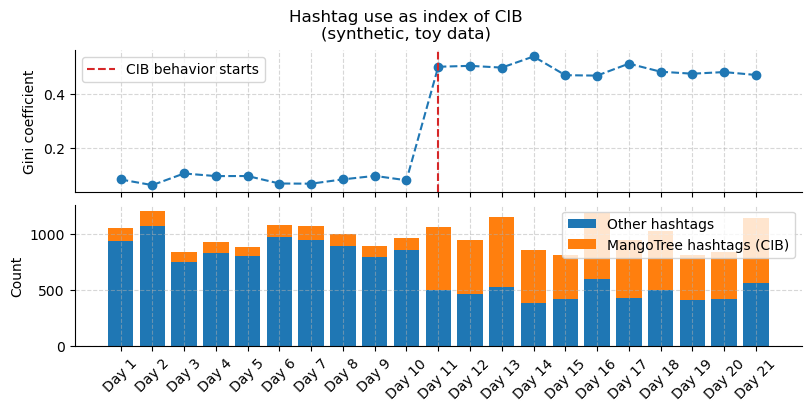

In [73]:
fig = plot_ginis(cib_ginis1, group_counts1)
fig.suptitle("Hashtag use as index of CIB\n(synthetic, toy data)")
plt.show()

## Increasing CIB (Gini should go up)
We can now increate the strength of CIB by almost a factor of two and let's check that the Gini reflects that. Indeed the Gini goes over 0.6 (vs. ~0.4 before).

In [74]:
base_rate = 30
injection_dict2 = {
    "Mangoes": 20.5, 
    "Mango": 13.3,
    "MangoTrees": 17.7,
    "MangoTango": 23.4,
    "MangoTime": 16.7,
    "LowHangingFruit": 10.8
}
tweets_dict2, vocab2 = simulate_toy_cib(
    base_rate=base_rate,
    injection_hashtags=injection_dict2,
    n_days=21,
    min_tweets=800,
    max_tweets=1200,
    seed=54321)

cib_ginis2, cib_counts2 = gini_cib(tweets_dict2, vocab2)
group_counts2 = get_group_counts(cib_counts2, vocab2, list(injection_dict2.keys()))

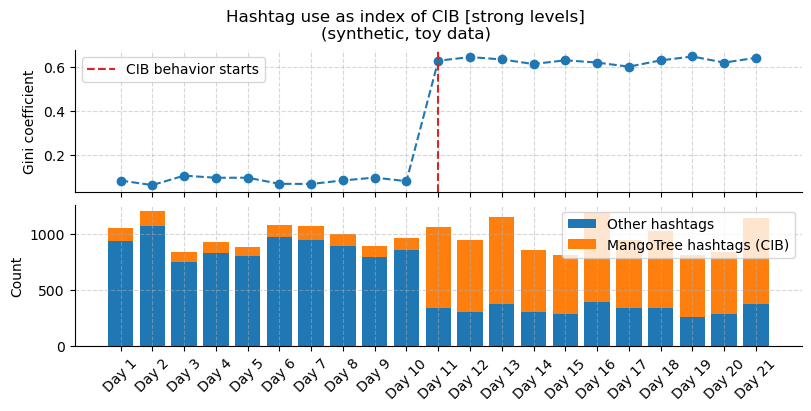

In [75]:
fig2 = plot_ginis(cib_ginis2, group_counts2)
fig2.suptitle("Hashtag use as index of CIB [increased CIB]\n(synthetic, toy data)")
plt.show()

## Decreasing CIB (lower Gini)
In the same way, we can try to simulate a weaker degree of CIB and redo the analysis. We see that now the Gini coefficient increases, albeat it is much weaker.

In [76]:
base_rate = 30
injection_dict3 = {
    "Mangoes": 1.5, 
    "Mango": 1.3,
    "MangoTrees": 2.7,
    "MangoTango": 1.4,
    "MangoTime": 1.7,
    "LowHangingFruit": 2.8
}
tweets_dict3, vocab3 = simulate_toy_cib(
    base_rate=base_rate,
    injection_hashtags=injection_dict3,
    n_days=21,
    min_tweets=800,
    max_tweets=1200,
    seed=54321)

cib_ginis3, cib_counts3 = gini_cib(tweets_dict3, vocab3)
group_counts3 = get_group_counts(cib_counts3, vocab3, list(injection_dict3.keys()))

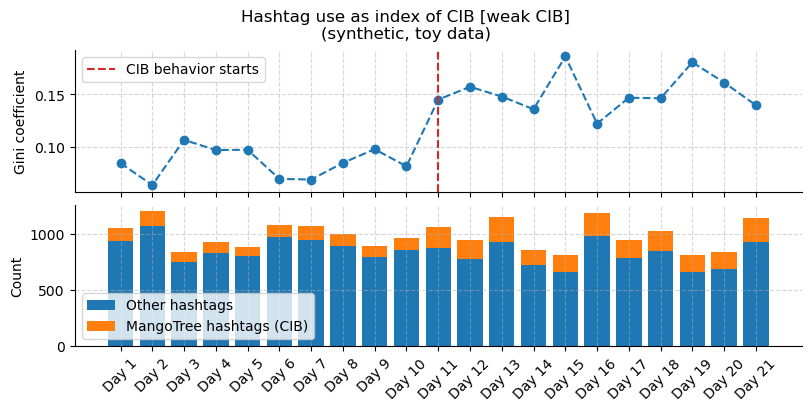

In [77]:
fig3 = plot_ginis(cib_ginis3, group_counts3)
fig3.suptitle("Hashtag use as index of CIB [decreased CIB]\n(synthetic, toy data)")
plt.show()

We can compare all three scenarios in the same plot and the same scale to confirm that indeed the test behaves as expected.

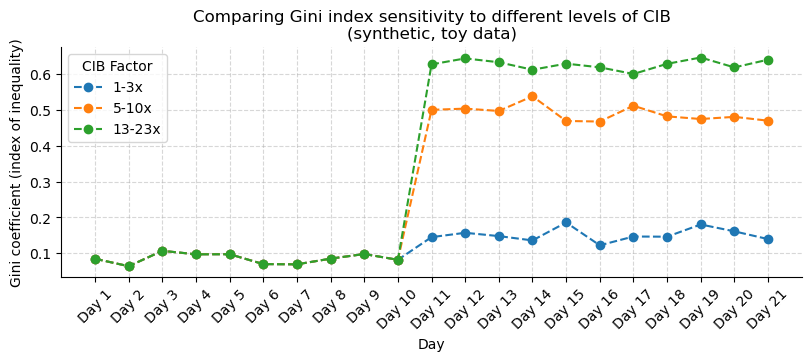

In [78]:
fig, ax = plt.subplots(figsize=(8, 3.5), sharey=True, layout="constrained")
xlabels = [f"Day {i+1}" for i in cib_ginis1.keys()]
ax.plot(xlabels, cib_ginis3.values(), ls="--", marker="o", label="1-3x")
ax.plot(xlabels, cib_ginis1.values(), ls="--", marker="o", label="5-10x")
ax.plot(xlabels, cib_ginis2.values(), ls="--", marker="o", label="13-23x")

ax.legend(title="CIB Factor")
ax.set_ylabel("Gini coefficient (index of inequality)")
ax.set_xlabel("Day")

ax.tick_params(axis="x", rotation=45)
ax.grid(visible=True, linestyle="--", alpha=0.5)
ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Comparing Gini index sensitivity to different levels of CIB\n(synthetic, toy data)")
plt.show()